In [216]:
import Bio #package
import Bio.PDB.parse_pdb_header #method
dirpath = '/Users/josephpepe/Desktop/pdb1/'#defining the directory location as a string variable
import os #package
directory = os.fsencode(dirpath) #method to encode the specified filename 

import pandas as pd
pdbfilenames = [] #creating an empty list that will be filled by the for loop. list of names in the directory

for file in os.listdir(directory): #looping through the files in the specified path
    filename = os.fsdecode(file)
    if filename.endswith(".pdb"): #selecting files that are .pdd
        pdbfilenames.append(filename)

pdbfilenames #outputting the generated list

['7n98.pdb', '7qud.pdb', '7ctq.pdb', '101m.pdb', '7u8d.pdb', '5f4j.pdb']

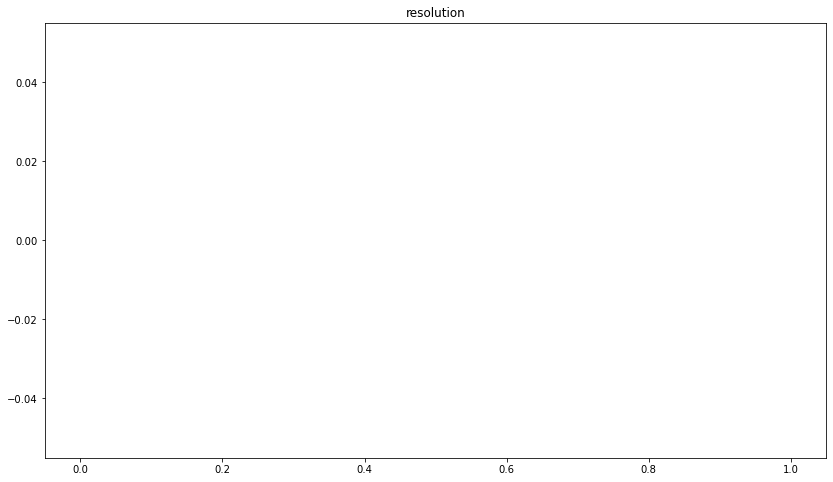

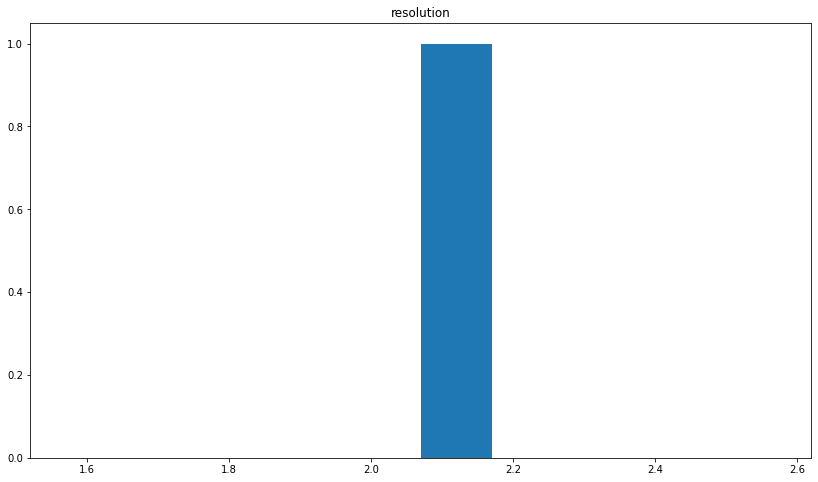

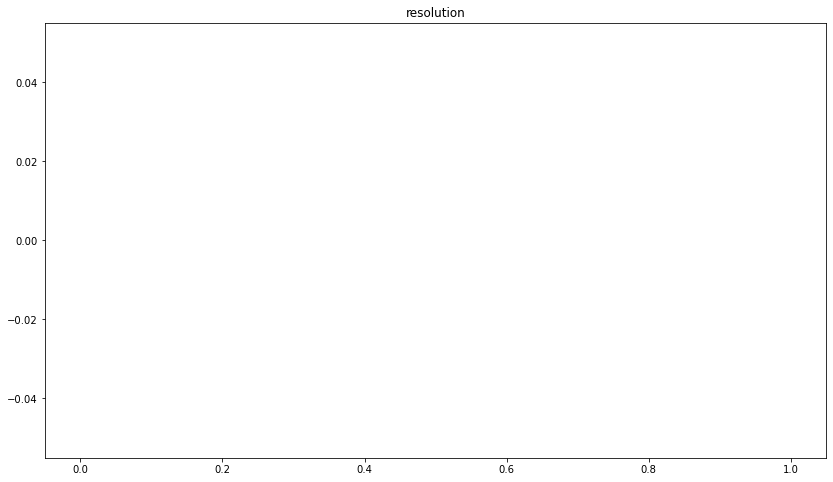

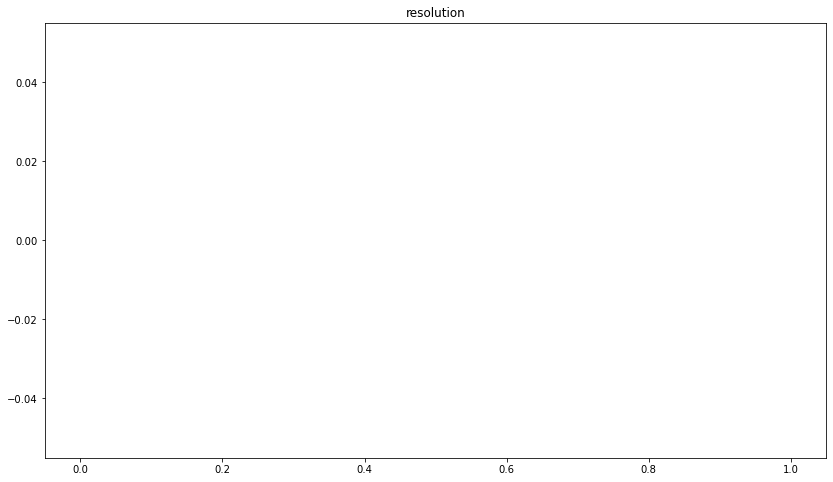

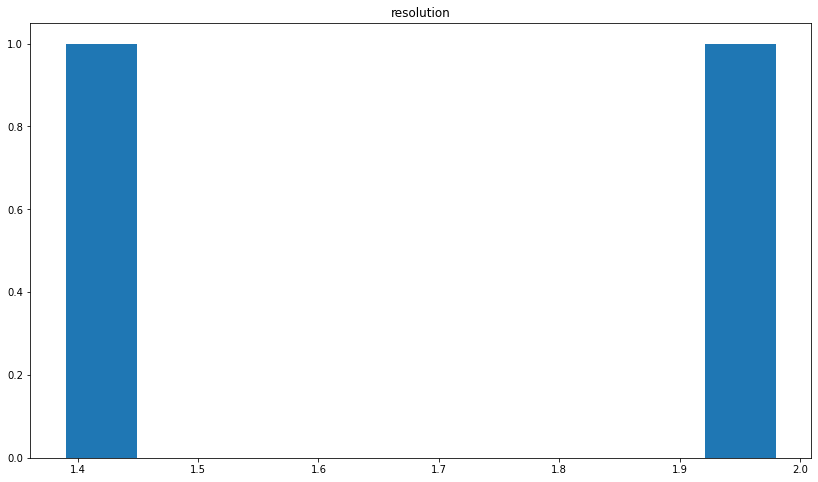

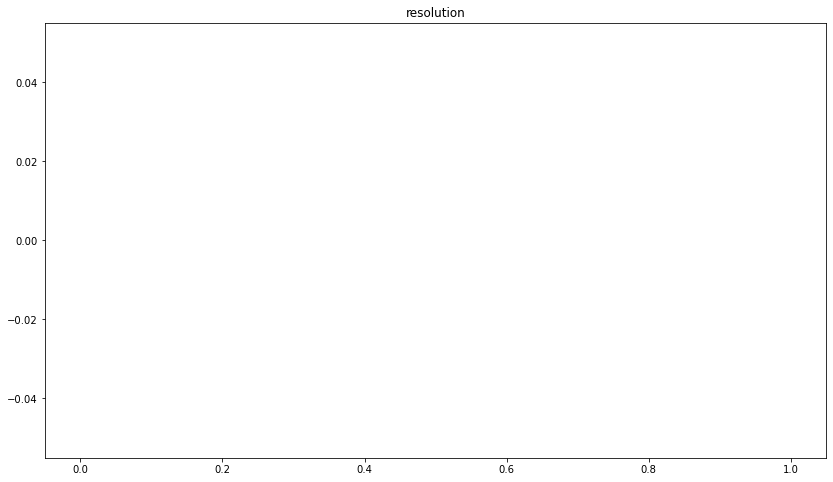

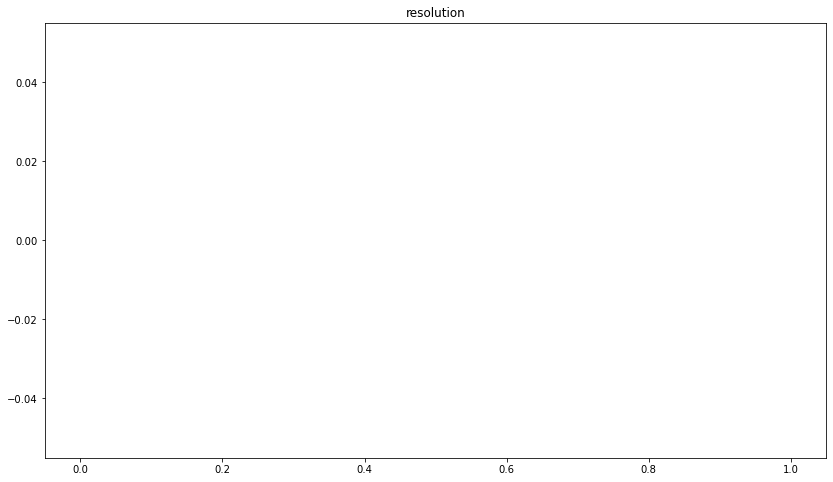

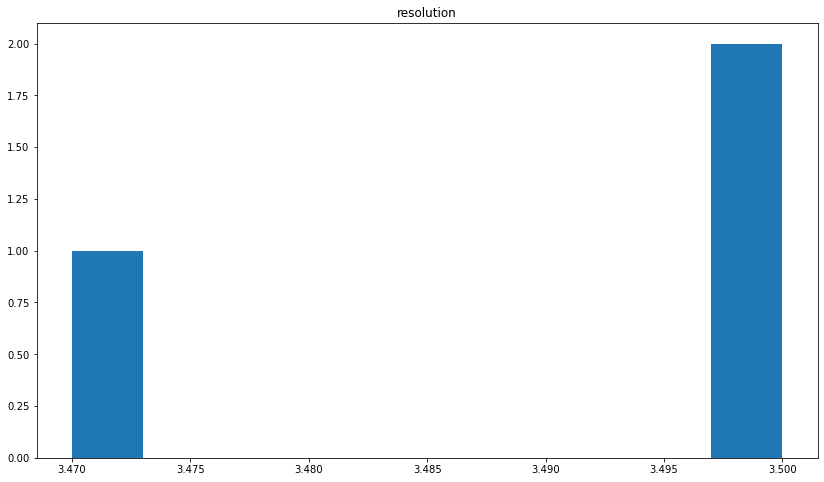

In [219]:

header_list =[] #empty list that will be ammended with dictionaries

#creates a dictionary for items in the PDB header, named header
def read_pdb_header (input_file):
    headerdetails = Bio.PDB.parse_pdb_header(input_file) #parsing PDB file, saving as "headerdetails"
    header_list.append(headerdetails) #adding those "headerdetails" to the header_list dictionary

   
for i in range(len(pdbfilenames)-1): #iteratively calling the function
    with open("/Users/josephpepe/Desktop/pdb1/"+pdbfilenames[i], "rb"): #iteratively pointing to the files
        read_pdb_header('/Users/josephpepe/Desktop/pdb1/'+pdbfilenames[i]) #calling the function for the file selected by above step
        
import pandas as pd #package
df = pd.DataFrame([header_list[0]]) #creating a dataframe, starting with the first entry of the output

value = 1 #setting a counting variable that will increase with each run of the for loop
for w in header_list: #moving through each item in the header_list 
    df.loc[value] = w #assigning each value from header_list to the dataframe
    value = value +1 #increasing counting variable, to keep for loop moving

#block to pull out data frames by technique and time interval from the big table, writes a list for plotting
#select Xray, time interval1
day1 = '1976-01-01'
day2 = '1989-12-31'
mask1 = (df['deposition_date'] > day1) & (df['deposition_date'] <= day2) & (df['structure_method'] == 'x-ray diffraction')
X76_89 = df.loc[mask1]

#select Xray, time interval2
day3 = '1990-01-01'
day4 = '1999-12-31'
mask2 = (df['deposition_date'] > day3) & (df['deposition_date'] <= day4) & (df['structure_method'] == 'x-ray diffraction')
X90_99 = df.loc[mask2]

#select Xray, time interval3
day5 = '2000-01-01'
day6 = '2009-12-31'
mask3 = (df['deposition_date'] > day5) & (df['deposition_date'] <= day6) & (df['structure_method'] == 'x-ray diffraction')
X00_09 = df.loc[mask3]

#select Xray, time interval4
day7 = '2010-01-01'
day8 = '2014-12-31'
mask4 = (df['deposition_date'] > day7) & (df['deposition_date'] <= day8) & (df['structure_method'] == 'x-ray diffraction')
X10_14 = df.loc[mask4]

#select Xray, time interval5
day9 = '2015-01-01'
day10 = '2022-12-31'
mask5 = (df['deposition_date'] > day9) & (df['deposition_date'] <= day10) & (df['structure_method'] == 'x-ray diffraction')
X15_22 = df.loc[mask5]

#select EM, time interval1
day_1 = '1990-01-01'
day_2 = '2009-12-31'
mask_1 = (df['deposition_date'] > day_1) & (df['deposition_date'] <= day_2) & (df['structure_method'] == 'electron microscopy')
E90_09 = df.loc[mask_1]

#select EM, time interval2
day_3 = '2010-01-01'
day_4 = '2014-12-31'
mask_2 = (df['deposition_date'] > day_3) & (df['deposition_date'] <= day_4) & (df['structure_method'] == 'electron microscopy')
E10_14 = df.loc[mask_2]

#select EM, time interval3
day_5 = '2015-01-01'
day_6 = '2022-12-31'
mask_3 = (df['deposition_date'] > day_5) & (df['deposition_date'] <= day_6) & (df['structure_method'] == 'electron microscopy')
E15_22 = df.loc[mask_3]

#write a list with each of the data frames we want to plot
toplot = [X76_89, X90_99, X00_09, X10_14, X15_22, E90_09, E10_14, E15_22]

import matplotlib.pyplot as plt #package
import numpy as np #package
import pandas as pd #package

#plot a histogram for each dataframe by looping over the list with an enumerator (x) to help with naming the plots. X runs from 0 to 7.
for x,j in enumerate(toplot):
    
    names = ["Xray_1976-89", "Xray_1990-99", "Xray_2000-2009", "Xray_2010-2014", "Xray_2015-2022", "EM_1990-2009", "EM_2010-2014", "EM_2015-2022"]
    
    #plotting function
    j.hist(column='resolution', grid=False, figsize=(14,8))
    
    # save figure
    plt.savefig( names[x] + ".png", dpi=350)
    
    # Show Plot
    plt.show()


In [218]:
df

,name,head,idcode,deposition_date,release_date,structure_method,resolution,structure_reference,journal_reference,author,compound,source,has_missing_residues,missing_residues,keywords,journal
0,cryo-em structure of mfsd2a,transport protein,7N98,2021-06-17,2021-08-04,electron microscopy,3.50,[],"c.a.p.wood,j.zhang,d.aydin,y.xu,b.j.andreone,u...","J.Zhang,L.Feng","{'1': {'misc': '', 'molecule': 'sodium-depende...","{'1': {'misc': '', 'organism_scientific': 'mus...",True,"[{'model': None, 'res_name': 'MET', 'chain': '...","membrane protein, transport protein","AUTH C.A.P.WOOD,J.ZHANG,D.AYDIN,Y.XU,B.J.AND..."
1,cryo-em structure of mfsd2a,transport protein,7N98,2021-06-17,2021-08-04,electron microscopy,3.50,[],"c.a.p.wood,j.zhang,d.aydin,y.xu,b.j.andreone,u...","J.Zhang,L.Feng","{'1': {'misc': '', 'molecule': 'sodium-depende...","{'1': {'misc': '', 'organism_scientific': 'mus...",True,"[{'model': None, 'res_name': 'MET', 'chain': '...","membrane protein, transport protein","AUTH C.A.P.WOOD,J.ZHANG,D.AYDIN,Y.XU,B.J.AND..."
2,d. melanogaster alpha/beta tubulin heterodimer...,cell cycle,7QUD,2022-01-17,2022-09-21,electron microscopy,3.47,[],"j.wagstaff,v.planelles-herrero,e.derivery,j.lo...","J.Wagstaff,V.J.Planelles-Herrero,E.Derivery,J....","{'1': {'misc': '', 'molecule': 'tubulin alpha-...","{'1': {'misc': '', 'organism_scientific': 'dro...",True,"[{'model': None, 'res_name': 'MET', 'chain': '...","cytyoskeleton, microtubules, cytomotive filame...","AUTH J.WAGSTAFF,V.PLANELLES-HERRERO,E.DERIVE..."
3,peptidyl tryptophan dihydroxylase qhpg essenti...,flavoprotein,7CTQ,2020-08-20,2021-02-17,x-ray diffraction,1.98,[],"t.oozeki,t.nakai,k.kozakai,k.okamoto,s.kuroda,...","T.Oozeki,T.Nakai,T.Okajima","{'1': {'misc': '', 'molecule': 'peptidyl trypt...","{'1': {'misc': '', 'organism_scientific': 'pse...",True,"[{'model': None, 'res_name': 'GLY', 'chain': '...","fad-dependent monooxygenase, cofactor biogenes...","AUTH T.OOZEKI,T.NAKAI,K.KOZAKAI,K.OKAMOTO,S...."
4,sperm whale myoglobin f46v n-butyl isocyanide ...,oxygen transport,101M,1997-12-13,1998-04-08,x-ray diffraction,2.07,[],r.d.smith correlations between bound n-alkyl i...,"R.D.Smith,J.S.Olson,G.N.Phillips Jr.","{'1': {'misc': '', 'molecule': 'myoglobin', 'c...","{'1': {'misc': '', 'organism_scientific': 'phy...",False,[],"ligand binding, oxygen storage, oxygen binding...",AUTH R.D.SMITHTITL CORRELATIONS BETWEEN BO...
5,fkbp12 mutant v55g bound to rapa*-3z,isomerase/isomerase inhibitor,7U8D,2022-03-08,2022-09-21,x-ray diffraction,1.39,[],"d.r.wassarman,k.bankapalli,l.j.pallanck,k.m.sh...","D.R.Wassarman,K.M.Shokat","{'1': {'misc': '', 'molecule': 'peptidyl-proly...","{'1': {'misc': '', 'organism_scientific': 'hom...",True,"[{'model': None, 'res_name': 'GLY', 'chain': '...","immunophilin, rotamase, protein binding, isome...","AUTH D.R.WASSARMAN,K.BANKAPALLI,L.J.PALLANCK..."
